# Ticket Price Prediction  

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

In [2]:
df=pd.read_csv("cinemaTicket_Ref.csv")


In [3]:
df.head()

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day
0,1492,304,3900000,26,0,4,4.26,150000.0,26,610.328638,2018-05-05,5,2,5
1,1492,352,3360000,42,0,5,8.08,80000.0,42,519.801980,2018-05-05,5,2,5
2,1492,489,2560000,32,0,4,20.00,80000.0,32,160.000000,2018-05-05,5,2,5
3,1492,429,1200000,12,0,1,11.01,100000.0,12,108.991826,2018-05-05,5,2,5
4,1492,524,1200000,15,0,3,16.67,80000.0,15,89.982004,2018-05-05,5,2,5


In [9]:
df.head(10)


,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day
0,1492,304,3900000,26,0,4,4.26,150000.000000,26,610.328638,2018-05-05,5,2,5
1,1492,352,3360000,42,0,5,8.08,80000.000000,42,519.801980,2018-05-05,5,2,5
2,1492,489,2560000,32,0,4,20.00,80000.000000,32,160.000000,2018-05-05,5,2,5
3,1492,429,1200000,12,0,1,11.01,100000.000000,12,108.991826,2018-05-05,5,2,5
4,1492,524,1200000,15,0,3,16.67,80000.000000,15,89.982004,2018-05-05,5,2,5
5,1492,71,1050000,7,0,3,0.98,150000.000000,7,714.285714,2018-05-05,5,2,5
6,1492,163,1020000,10,0,3,7.69,102000.000000,10,130.039012,2018-05-05,5,2,5
7,1492,450,750000,5,0,3,1.57,150000.000000,5,318.471338,2018-05-05,5,2,5
8,1492,51,750000,11,0,2,0.95,68181.818182,11,1157.894737,2018-05-05,5,2,5
9,1492,522,600000,4,0,3,1.55,150000.000000,4,258.064516,2018-05-05,5,2,5


In [10]:
df.iloc[0:5,0:14]

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day
0,1492,304,3900000,26,0,4,4.26,150000.0,26,610.328638,2018-05-05,5,2,5
1,1492,352,3360000,42,0,5,8.08,80000.0,42,519.801980,2018-05-05,5,2,5
2,1492,489,2560000,32,0,4,20.00,80000.0,32,160.000000,2018-05-05,5,2,5
3,1492,429,1200000,12,0,1,11.01,100000.0,12,108.991826,2018-05-05,5,2,5
4,1492,524,1200000,15,0,3,16.67,80000.0,15,89.982004,2018-05-05,5,2,5


In [11]:
df.shape


(142524, 14)

In [12]:
df.info

<bound method DataFrame.info of         film_code  cinema_code  total_sales  tickets_sold  tickets_out  \
0            1492          304      3900000            26            0   
1            1492          352      3360000            42            0   
2            1492          489      2560000            32            0   
3            1492          429      1200000            12            0   
4            1492          524      1200000            15            0   
...           ...          ...          ...           ...          ...   
142519       1569          495      1320000            22            0   
142520       1569          474      1200000            15            0   
142521       1569          524      1060000             8            0   
142522       1569          529       600000             5            0   
142523       1569          486       250000             5            0   

        show_time  occu_perc  ticket_price  ticket_use    capacity  \
0        

In [13]:
df.dtypes

film_code         int64
cinema_code       int64
total_sales       int64
tickets_sold      int64
tickets_out       int64
show_time         int64
occu_perc       float64
ticket_price    float64
ticket_use        int64
capacity        float64
date             object
month             int64
quarter           int64
day               int64
dtype: object

In [14]:
df['date']=pd.to_datetime(df['date'])

In [15]:
df.dtypes

film_code                int64
cinema_code              int64
total_sales              int64
tickets_sold             int64
tickets_out              int64
show_time                int64
occu_perc              float64
ticket_price           float64
ticket_use               int64
capacity               float64
date            datetime64[ns]
month                    int64
quarter                  int64
day                      int64
dtype: object

In [16]:
for i in df.columns:
    print(i)

film_code
cinema_code
total_sales
tickets_sold
tickets_out
show_time
occu_perc
ticket_price
ticket_use
capacity
date
month
quarter
day


In [17]:
df.describe()

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,month,quarter,day
count,142524.000000,142524.000000,1.425240e+05,142524.000000,142524.000000,142524.000000,142399.000000,142524.000000,142524.000000,142399.000000,142524.000000,142524.000000,142524.000000
mean,1518.985111,320.378427,1.234728e+07,140.137570,0.237413,3.932103,19.965986,81234.599886,139.900157,854.723605,6.776852,2.634721,16.112585
std,36.184450,159.701229,3.065486e+07,279.758733,2.923206,3.056276,22.653445,33236.599278,279.564935,953.118103,2.195843,0.809692,8.949471
min,1471.000000,32.000000,2.000000e+04,1.000000,0.000000,1.000000,0.000000,483.870968,-219.000000,-2.000000,2.000000,1.000000,1.000000
25%,1485.000000,181.000000,1.260000e+06,18.000000,0.000000,2.000000,3.750000,60000.000000,18.000000,276.994486,5.000000,2.000000,8.000000
50%,1498.000000,324.000000,3.720000e+06,50.000000,0.000000,3.000000,10.350000,79454.235185,50.000000,525.714286,7.000000,3.000000,16.000000
75%,1556.000000,474.000000,1.110000e+07,143.000000,0.000000,5.000000,28.210000,100000.000000,143.000000,1038.961039,9.000000,3.000000,24.000000
max,1589.000000,637.000000,1.262820e+09,8499.000000,311.000000,60.000000,147.500000,700000.000000,8499.000000,9692.097160,11.000000,4.000000,31.000000


In [18]:
df=df.drop(columns=['film_code']).drop(columns=['cinema_code'])

In [19]:
df['total_sales'].unique()


array([ 3900000,  3360000,  2560000, ..., 76275000, 37775000, 42170000],
      dtype=int64)

In [20]:
df['tickets_sold'].unique()

array([  26,   42,   32, ..., 1525, 1817, 2024], dtype=int64)

In [21]:
df['tickets_out'].unique()

array([  0,   1,   3,   2,   4,   5,  25,   8,  10,   6,   7,  21,   9,
        13,  14,  11,  12,  16,  41,  50,  20,  75,  15,  23,  18,  89,
       121, 126,  55,  68,  40,  98, 104,  43,  29,  82,  26, 100,  17,
       176,  31,  33,  35,  30,  27,  45,  46,  62,  60,  39,  19,  32,
        77,  28, 196,  22,  53, 119,  48,  37,  93,  59,  65,  24, 208,
        36, 242, 265, 183,  34,  54,  79,  99,  85,  70, 101, 311,  91,
       108, 158, 111, 199,  38,  51, 106, 105,  86,  56,  87,  42,  64,
        49,  97,  44,  84,  52], dtype=int64)

In [22]:
df['show_time'].unique()

array([ 4,  5,  1,  3,  2,  6,  7,  8, 14,  9, 12, 10, 15, 16, 13, 11, 17,
       19, 18, 22, 26, 24, 20, 21, 27, 38, 28, 40, 29, 23, 25, 30, 31, 32,
       33, 35, 36, 44, 52, 46, 43, 39, 42, 48, 50, 47, 60, 34, 45, 37, 41],
      dtype=int64)

In [23]:
df['occu_perc'].unique()

array([ 4.26,  8.08, 20.  , ..., 94.49, 52.54, 53.07])

In [24]:
df['ticket_price'].unique()

array([150000.       ,  80000.       , 100000.       , ...,
        83703.7037037, 149539.0070922, 126400.       ])

In [25]:
df

,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day
0,3900000,26,0,4,4.26,150000.0,26,610.328638,2018-05-05,5,2,5
1,3360000,42,0,5,8.08,80000.0,42,519.801980,2018-05-05,5,2,5
2,2560000,32,0,4,20.00,80000.0,32,160.000000,2018-05-05,5,2,5
3,1200000,12,0,1,11.01,100000.0,12,108.991826,2018-05-05,5,2,5
4,1200000,15,0,3,16.67,80000.0,15,89.982004,2018-05-05,5,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...
142519,1320000,22,0,2,3.86,60000.0,22,569.948187,2018-11-04,11,4,4
142520,1200000,15,0,1,65.22,80000.0,15,22.999080,2018-11-04,11,4,4
142521,1060000,8,0,3,9.20,132500.0,8,86.956522,2018-11-04,11,4,4
142522,600000,5,0,2,5.00,120000.0,5,100.000000,2018-11-04,11,4,4


In [26]:
df.total_sales.value_counts().sort_index()

20000         1
24000         1
25000         2
28000         1
30000         5
             ..
1003694994    1
1042239993    1
1058979995    1
1166354984    1
1262819994    1
Name: total_sales, Length: 9464, dtype: int64

In [27]:
df.tickets_out.value_counts().sort_index()

0      136396
1        1496
2        1614
3         762
4         604
        ...  
199         1
208         1
242         1
265         1
311         1
Name: tickets_out, Length: 96, dtype: int64

In [28]:
df.apply("mean")

C:\Users\KIIT\AppData\Local\Temp\ipykernel_18164\815025580.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df.apply("mean")


total_sales     1.234728e+07
tickets_sold    1.401376e+02
tickets_out     2.374126e-01
show_time       3.932103e+00
occu_perc       1.996599e+01
ticket_price    8.123460e+04
ticket_use      1.399002e+02
capacity        8.547236e+02
month           6.776852e+00
quarter         2.634721e+00
day             1.611258e+01
dtype: float64

C:\Users\KIIT\AppData\Local\Temp\ipykernel_18164\1072140413.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

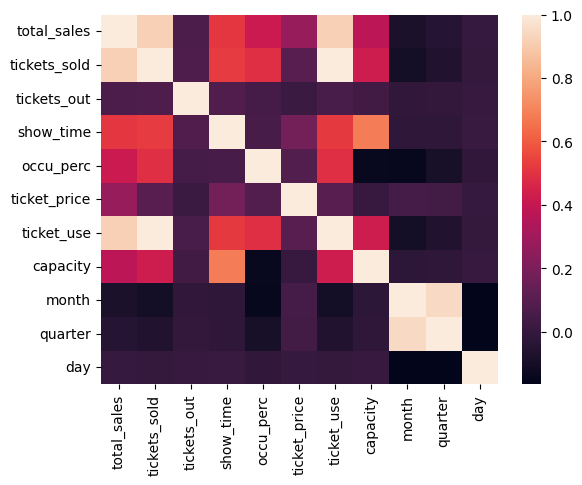

In [29]:
sns.heatmap(df.corr())


In [30]:
correlations=df.corr()["ticket_price"]
correlations

C:\Users\KIIT\AppData\Local\Temp\ipykernel_18164\387229829.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations=df.corr()["ticket_price"]


total_sales     0.272450
tickets_sold    0.103596
tickets_out     0.011916
show_time       0.176274
occu_perc       0.084666
ticket_price    1.000000
ticket_use      0.103544
capacity        0.004287
month           0.048007
quarter         0.042031
day             0.001113
Name: ticket_price, dtype: float64

In [31]:
correlations.sort_values(ascending=False)

ticket_price    1.000000
total_sales     0.272450
show_time       0.176274
tickets_sold    0.103596
ticket_use      0.103544
occu_perc       0.084666
month           0.048007
quarter         0.042031
tickets_out     0.011916
capacity        0.004287
day             0.001113
Name: ticket_price, dtype: float64

In [32]:
def get_features(correlation_threshold):
    abs_corrs=correlations.abs()
    high_correlations=abs_corrs[abs_corrs>correlation_threshold].index.values.tolist()
    return high_correlations

In [33]:
#taking correlation more than 0.05 on X axis and Quality on Y axis
features=get_features(0.05)
print(features)
x=df[features]
y=df['ticket_price']

['total_sales', 'tickets_sold', 'show_time', 'occu_perc', 'ticket_price', 'ticket_use']


{'whiskers': [<matplotlib.lines.Line2D at 0x2192997d030>,
 'caps': [<matplotlib.lines.Line2D at 0x2192997d570>,
 'boxes': [<matplotlib.lines.Line2D at 0x2192997cd90>],
 'medians': [<matplotlib.lines.Line2D at 0x2192997dab0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2192997dd50>],
 'means': []}

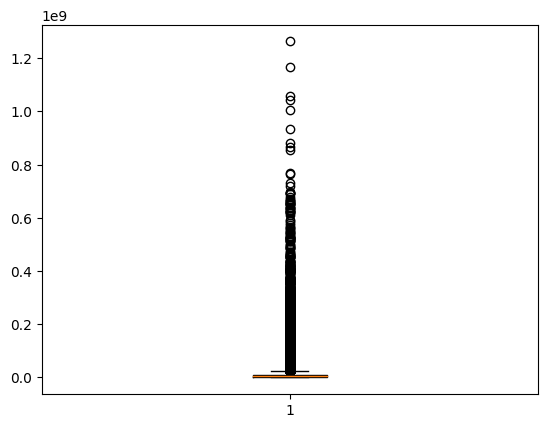

In [34]:
plt.boxplot(df['total_sales'])

C:\Users\KIIT\AppData\Local\Temp\ipykernel_18164\761655592.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["ticket_price"],kde=False)


<Axes: xlabel='ticket_price'>

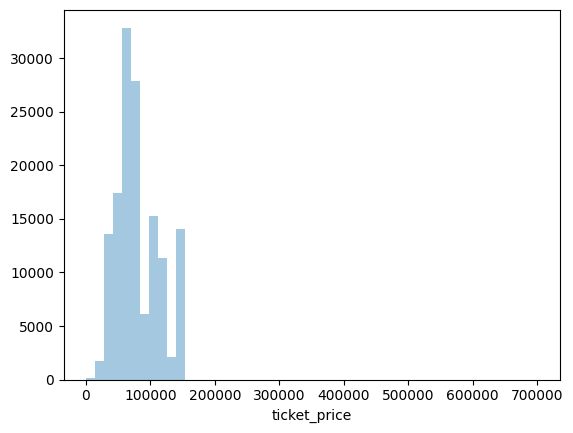

In [35]:
sns.distplot(df["ticket_price"],kde=False)

In [36]:
df.isnull().sum()


total_sales       0
tickets_sold      0
tickets_out       0
show_time         0
occu_perc       125
ticket_price      0
ticket_use        0
capacity        125
date              0
month             0
quarter           0
day               0
dtype: int64

In [37]:
df.dropna(inplace=True)
print("Null values are dropped")

Null values are dropped


In [38]:
df.isnull().sum()

total_sales     0
tickets_sold    0
tickets_out     0
show_time       0
occu_perc       0
ticket_price    0
ticket_use      0
capacity        0
date            0
month           0
quarter         0
day             0
dtype: int64

In [39]:
x=df[['tickets_sold', 'show_time', 'occu_perc', 'ticket_price', 'ticket_use']]
y=df['total_sales']

In [40]:
x

,tickets_sold,show_time,occu_perc,ticket_price,ticket_use
0,26,4,4.26,150000.0,26
1,42,5,8.08,80000.0,42
2,32,4,20.00,80000.0,32
3,12,1,11.01,100000.0,12
4,15,3,16.67,80000.0,15
...,...,...,...,...,...
142519,22,2,3.86,60000.0,22
142520,15,1,65.22,80000.0,15
142521,8,3,9.20,132500.0,8
142522,5,2,5.00,120000.0,5


In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=56)

In [42]:
regressor=LinearRegression()
regressor.fit(x_train,y_train)


LinearRegression()

In [43]:
regressor.intercept_

-13831468.911539571

In [44]:
predicting_the_dataset=regressor.predict(x_test)
predicting_the_dataset.size

42720

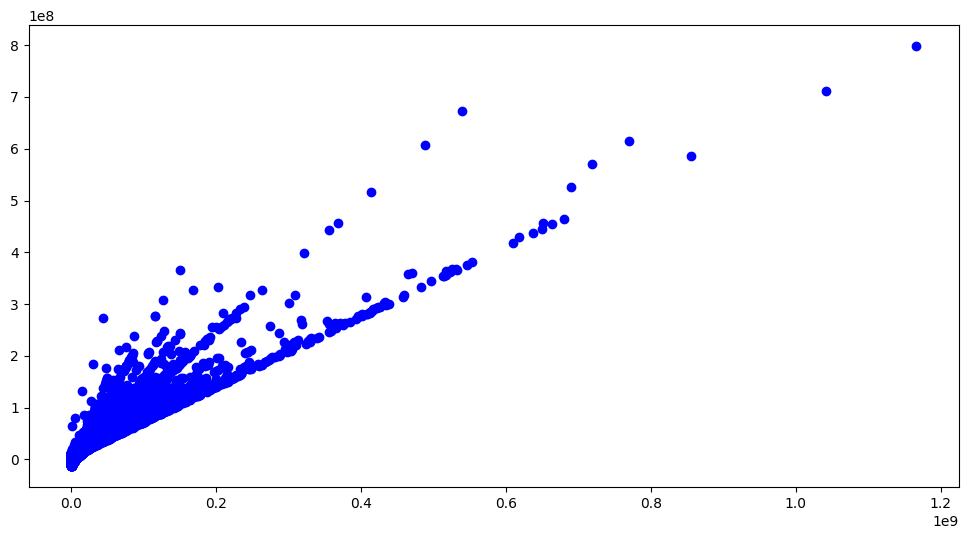

In [45]:
plt.figure(figsize=(12,6))
plt.scatter(y_test,predicting_the_dataset,color='b')
plt.show()

In [46]:
from sklearn.metrics import r2_score
r_squared=r2_score(y_test,predicting_the_dataset)
r_squared
print("R2 Score by applying Linear Regression Method:-",r_squared)

R2 Score by applying Linear Regression Method:- 0.87217427395451


In [47]:
#Let's check for other metrics too
print('MAE: {}'.format(metrics.mean_absolute_error(y_test, predicting_the_dataset)))
print('MSE: {}'.format(metrics.mean_squared_error(y_test, predicting_the_dataset)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, predicting_the_dataset))))

MAE: 4945048.543830934
MSE: 127475540012616.75
RMSE: 11290506.632238287


In [48]:
#Using KNN Classifier 

from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
classifier.fit(x_train, y_train) 

KNeighborsClassifier()

In [49]:
#Predicting the test set result  
y_pred= classifier.predict(x_test) 
y_pred

array([ 1260000,   960000, 22140000, ...,  8400000,  6400000,  1800000],
      dtype=int64)

In [50]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)
cm

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]], dtype=int64)

In [51]:
rr_squared=r2_score(y_test,y_pred)
rr_squared
print("R2 Score by applying KNN Classifier:-",rr_squared)

R2 Score by applying KNN Classifier:- 0.9610027720968329


In [52]:
from sklearn.tree import DecisionTreeClassifier  
classifier1= DecisionTreeClassifier(criterion='entropy', random_state=0)  
classifier1.fit(x_train, y_train)  

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [53]:
y1_pred= classifier1.predict(x_test) 
y1_pred

array([ 1260000,   960000, 38580000, ...,  8500000,  6500000,  1800000],
      dtype=int64)

In [54]:
rr1_squared=r2_score(y_test,y1_pred)
rr1_squared
print("R2 Score by applying Decision Tree:-",rr1_squared)

R2 Score by applying Decision Tree:- 0.9773992832920176


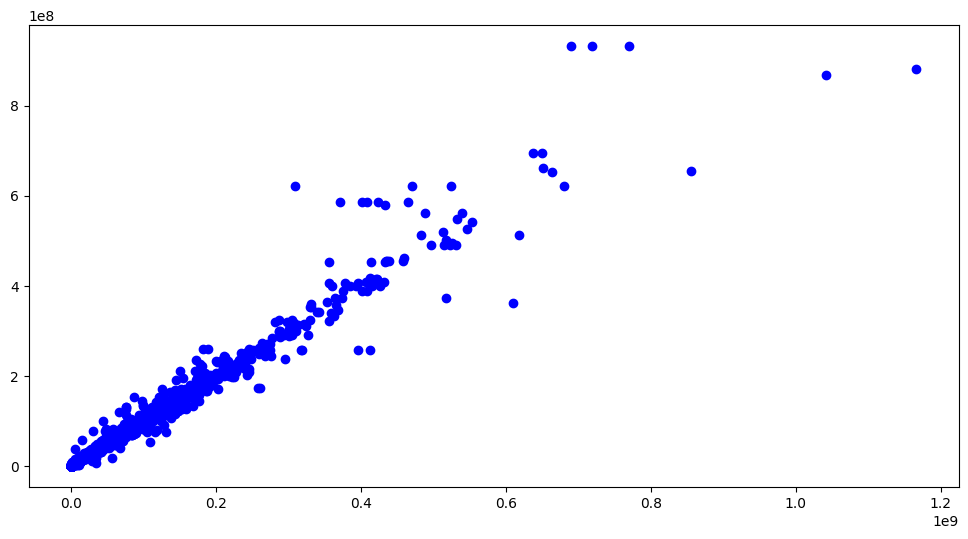

In [55]:
#Applying graph for Decision tree
plt.figure(figsize=(12,6))
plt.scatter(y_test,y1_pred,color='b')
plt.show()

In [59]:
#Let's check for other metrics too
print('MAE: {}'.format(metrics.mean_absolute_error(y_test, y1_pred)))
print('MSE: {}'.format(metrics.mean_squared_error(y_test, y1_pred)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, y1_pred))))

MAE: 385434.292673221
MSE: 22538800726208.496
RMSE: 4747504.6841692


## In this project we use Linear Regression Model,KNN Model,Decision Tree Model to get best model for ticket price prediction and we conclude that 

## R2 Score for different models are as such
## Linear Regression :-0.87217427395451
## KNN Model :-0.9610027720968329
## Decision Tree Model:- 0.9773992832920176